In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import librosa.display


# 設置參數
fs = 8000  # 取樣頻率
duration = 10  # 訊號長度（秒）

# 生成時間向量
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# 生成音訊信號
x1_signal = np.sin(2000 * t**2)  # 這是您的𝑥1信號
x2_signal = np.sin(2000 *  t + 10 * np.sin(2.5* t**2))  # 這是您的𝑥2信號

# 寫入音訊文件
sf.write('x1.wav', x1_signal, fs)
sf.write('x2.wav', x2_signal, fs)




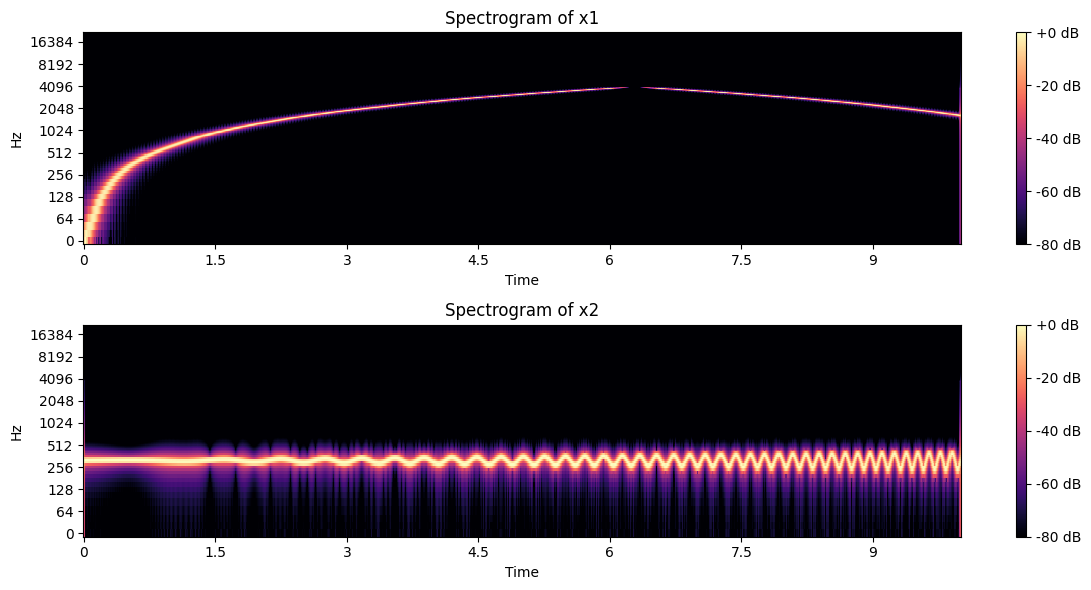

In [2]:


# Load the audio signals
x1, sr1 = librosa.load('x1.wav', sr=44100)
x2, sr2 = librosa.load('x2.wav', sr=44100)

# Calculate the STFTs of the signals
n_fft = 2048
hop_length = 512
stft1 = librosa.stft(x1, n_fft=n_fft, hop_length=hop_length)
stft2 = librosa.stft(x2, n_fft=n_fft, hop_length=hop_length)

# Calculate the magnitudes of the STFTs
mag1 = librosa.amplitude_to_db(abs(stft1), ref=np.max)
mag2 = librosa.amplitude_to_db(abs(stft2), ref=np.max)

# Plot the spectrograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(mag1, sr=sr1, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title('Spectrogram of x1')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(mag2, sr=sr2, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title('Spectrogram of x2')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()